# Numerical Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Analytical Mechanics - Underdamping oscillation

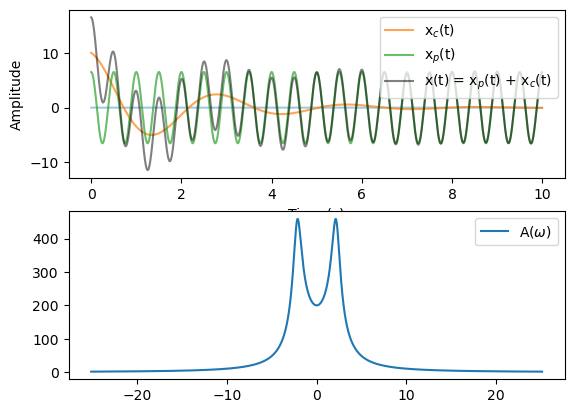

In [2]:
def complementary_solution(t, A, gamma, omega0, phi):
    return A*np.exp(-gamma*t)*np.cos(np.sqrt(omega0**2 - gamma**2)*t + phi)

def amplitude(F0, m, gamma, omega0, omega):
    return (F0/m) / (np.sqrt((omega0**2 - omega**2)**2 + 4*(omega**2)*(gamma**2)))

def particular_solution(t, F0, m, gamma, omega0, omega, phi):
    return amplitude(F0, m, gamma, omega0, omega)*np.cos(omega*t + phi)

gamma = lambda c, m: c/(2*m)
omega0 = lambda k, m: np.sqrt(k/m)

F0 = 2000
A = 10
c = 2
m = 2
k = 10
t_vec = np.arange(0.0, 10, 1.0/200.0)
omega_vec = np.arange(-2*np.pi*4, 2*np.pi*4, 0.01)
omega = 2*np.pi*2
omegaR = np.sqrt(omega0(k, m)**2 - 2*(gamma(c, m)**2))

xct = complementary_solution(t_vec, A, gamma(c, m), omega0(k, m), 0)
xpt = particular_solution(t_vec, F0, m, gamma(c, m), omega0(k, m), omega, 0)

fig, (ax, ax0)= plt.subplots(2, 1)
ax.plot(t_vec, np.zeros(t_vec.size), alpha=0.4)
ax.plot(t_vec, xct, label="x$_c$(t)", alpha=0.7)
ax.plot(t_vec, xpt, label="x$_p$(t)", alpha=0.7)
ax.plot(t_vec, xct+xpt, 'k', label="x(t) = x$_p$(t) + x$_c$(t)", alpha=0.5)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.legend()

amplitude_vec = amplitude(F0, m, gamma(c, m), omega0(k, m), omega_vec)
ax0.plot(omega_vec, amplitude_vec, label=r"A($\omega$)")
ax0.legend()
plt.show()

# print(omega_vec[amplitude_vec > 420], omegaR)

## Modern Physics - Psi visualization

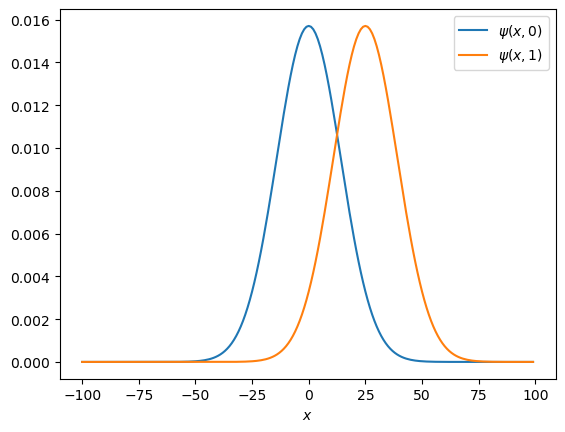

In [12]:
# Psi (density of probibility) at t=0 
# Inputs:
# x_bound: (tuple)
#   - [0]: indicates lower bound
#   - [1]: indicates upper bound
#   - [2]: indicates distance between each value (step)
# 
# ing_bound: (tuple)
#   - [0]: indicates lower bound
#   - [1]: indicates upper bound
# 
# Returns:
# x: x vector which psi is built on
# psi: value of psi for given x vector
def psi(x_bound:tuple , ing_bound:tuple, t=0, v_group=0):
    dk = 0.01 # integral dummy variable
    alpha = 200 # a = 1/(\sigma * sqrt(2*pi)) => \sigma =  variance
    k0 = 10 # Base frequency
    k_array = np.arange(ing_bound[0], ing_bound[1], dk) # Integration boundaries
    x = np.arange(x_bound[0], x_bound[1], x_bound[2])
    omega = lambda k: v_group*k
    _psi = 0
    for k in k_array:
        _psi += np.exp((-alpha * (k - k0)**2) + (1j * (k*x - omega(k)*t))) * dk
    
    return (x, _psi)

t = 1
v_group = 25 # wave speed
x_vec, psi_vec = psi((-100, 100, 1), (-400, 400))
x_vec_1, psi_vec_1 = psi((-100, 100, 1), (-400, 400), t=t, v_group=v_group)

plt.subplot(111)
plt.plot(x_vec, np.abs(psi_vec)**2, label=r"$\psi(x, 0)$")
plt.plot(x_vec_1, np.abs(psi_vec_1)**2, label=r"$\psi(x, 1)$")
plt.xlabel(r"$x$")
# plt.ylabel(r"$\psi(x, 0)$")
plt.legend()
plt.show()